In [24]:
import pandas as pd

saheart = pd.read_csv('../data/SAheart.csv')

In [25]:
saheart.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [26]:
saheart.head(3)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No


In [27]:
saheart.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [28]:
saheart.famhist.describe()

count        462
unique         2
top       Absent
freq         270
Name: famhist, dtype: object

In [29]:
saheart.famhist = saheart.famhist.map({'Present': 1, 'Absent': 0})
saheart.head(3)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,No


In [30]:
saheart.famhist.describe()

count    462.000000
mean       0.415584
std        0.493357
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: famhist, dtype: float64

In [31]:
X = saheart.iloc[:, :9]
y = saheart.iloc[:, 9]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Model

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [44]:
def run_model(model, model_name, plot_index):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test) * 100
    
    plot_index -=1
    ax = axes[plot_index//3, plot_index%3]
    
    colorcodes = {'Si': 'red', 'No': 'blue'}
    true_colors = [colorcodes[x] for x in y_test]
    pred_colors = [colorcodes[x] for x in y_pred]
    
    ax.scatter(X_test["obesity"], X_test['alcohol'], marker='.', color=true_colors, label='Ground truth')
    ax.scatter(X_test["obesity"], X_test['alcohol'], marker='o', facecolors='none', color=pred_colors, label='Prediction')
    
    ax.legend(loc='upper right')
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')
    
    ax.set_title('Accuracy = ' + str(round(accuracy,4)) + model_name)
    

C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


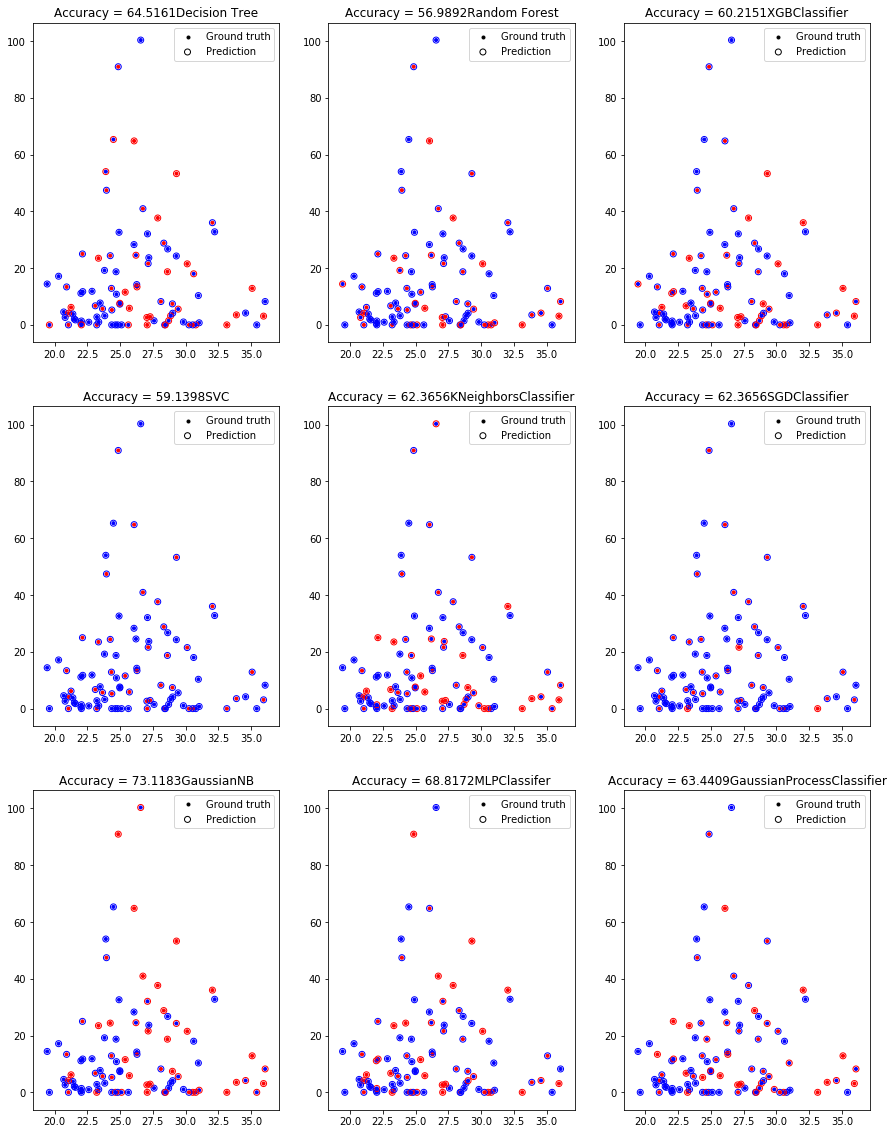

In [45]:
fig = plt.figure(figsize=(15, 20))
axes = fig.subplots(nrows=3, ncols=3)

# Decision tree  
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
run_model(model, "Decision Tree", 1)

# Random forest  
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest", 2)

# XGBoost  
from xgboost import XGBClassifier
model = XGBClassifier()
run_model(model, "XGBClassifier", 3)

# SVM  
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVC", 4)

# KNN  
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
run_model(model, "KNeighborsClassifier", 5)

# SGD  
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
run_model(model, "SGDClassifier", 6)

# Gaussian Naive Bayes  
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
run_model(model, "GaussianNB", 7)

# Neural network  
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
run_model(model, "MLPClassifer", 8)

# Gaussian Process  
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier()
run_model(model, "GaussianProcessClassifier", 9)